In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 522.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [4]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


paper ลองอันนี้


In [ ]:
%cd /content/drive/MyDrive/YangBOT/Source code /YOLO v2/YangBOTv2/train/weights

/content/drive/.shortcut-targets-by-id/14RYTmLbBRnGHmLgU_C0HdMCwRUWiVbaN/YangBOT/Source code /YOLO v2/YangBOTv2/train/weights


In [ ]:
%ls

best.pt  last.pt


Image dimensions: 1280x960

0: 480x640 17 CLSs, 751.1ms
Speed: 3.1ms preprocess, 751.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
[{'class': 'CLS', 'conf': 0.7798995971679688, 'position': (782, 572, 839, 629)}, {'class': 'CLS', 'conf': 0.7000952959060669, 'position': (782, 445, 825, 488)}, {'class': 'CLS', 'conf': 0.6882746815681458, 'position': (565, 668, 604, 704)}, {'class': 'CLS', 'conf': 0.6413605213165283, 'position': (393, 677, 435, 706)}, {'class': 'CLS', 'conf': 0.6203135251998901, 'position': (480, 409, 530, 446)}, {'class': 'CLS', 'conf': 0.6033712029457092, 'position': (532, 354, 580, 393)}, {'class': 'CLS', 'conf': 0.5863128304481506, 'position': (930, 563, 970, 602)}, {'class': 'CLS', 'conf': 0.5446622967720032, 'position': (1052, 485, 1090, 516)}, {'class': 'CLS', 'conf': 0.5441849827766418, 'position': (801, 396, 845, 434)}, {'class': 'CLS', 'conf': 0.541190505027771, 'position': (548, 520, 585, 556)}, {'class': 'CLS', 'conf': 0.5313677787780762,

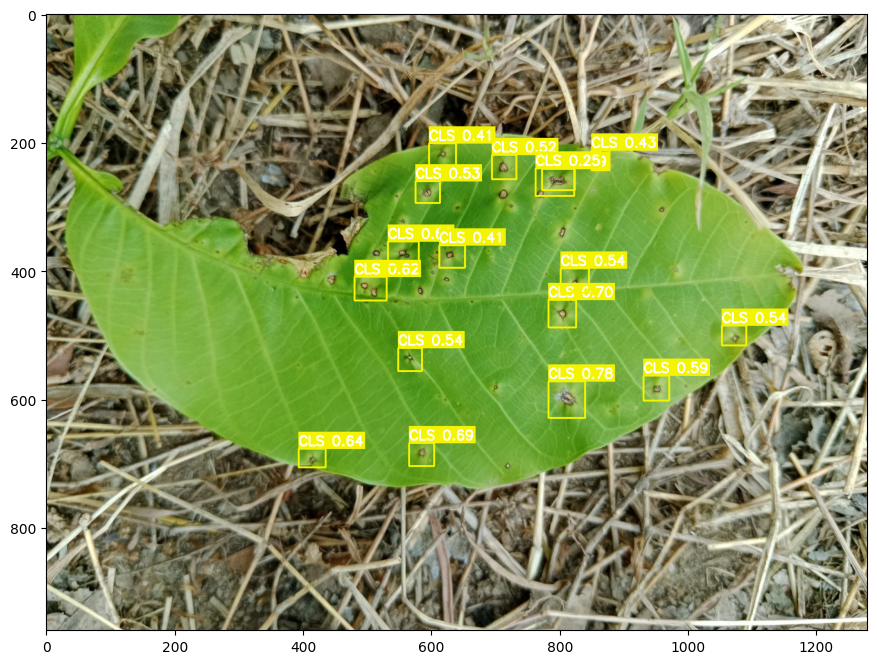

In [18]:
img = cv2.imread('/content/67PNA07_1CLS_96.jpg')
# img = cv2.imread('/content/67PNA07_1CLS_100.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (640, 640))

img_top3 = img.copy()

model = YOLO('/content/best (5).pt')
names = model.names

w, h = img.shape[1], img.shape[0]
print(f"Image dimensions: {w}x{h}")

results = model.predict(source=img, conf=0.25)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

class_data = [] # สร้าง list ของทุก Class
for box, cls, conf in zip(results[0].boxes.xyxy, results[0].boxes.cls, results[0].boxes.conf):
    x1, y1, x2, y2 = map(int, box.tolist())
    class_id = int(cls)
    class_name = names[class_id]
    confidence = float(conf)
    class_data.append({
        'class': class_name,
        'conf': confidence,
        'position': (x1, y1, x2, y2)
    })


class_data.sort(key=lambda x: x['conf'], reverse=True)

print(class_data)
# RGB
class_colors = {
    'Healthy': (0, 255, 0),
    'LFNS': (255, 128, 0),
    'LFS': (204, 0, 0),
    'PM': (155, 155, 0),
    'CoryL': (255, 255, 0),
    'BES': (255, 255, 0),
    'CLS': (244, 244, 0),
}


for data in class_data:
    class_name = data['class']
    confidence = data['conf']
    x1, y1, x2, y2 = data['position']

    color = class_colors.get(class_name, (128, 128, 128))

    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    label = f'{class_name} {confidence:.2f}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    font_thickness = 2

    (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

    cv2.rectangle(img, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)
    cv2.putText(img, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

plt.figure(figsize=(20, 8))
plt.imshow(img)
plt.show()

Image dimensions: 640x640

0: 640x640 6 LFNSs, 1 LFS, 630.5ms
Speed: 4.7ms preprocess, 630.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
[{'class': 'LFNS', 'conf': 0.8000221252441406, 'position': (273, 234, 299, 270)}, {'class': 'LFNS', 'conf': 0.7505527138710022, 'position': (322, 416, 343, 445)}, {'class': 'LFNS', 'conf': 0.6631059050559998, 'position': (437, 418, 457, 440)}, {'class': 'LFNS', 'conf': 0.5399536490440369, 'position': (258, 337, 282, 369)}, {'class': 'LFS', 'conf': 0.28015783429145813, 'position': (338, 326, 360, 352)}, {'class': 'LFNS', 'conf': 0.27753493189811707, 'position': (369, 333, 401, 386)}, {'class': 'LFNS', 'conf': 0.2646525204181671, 'position': (429, 265, 446, 287)}]
มี Object ทั้งหมด 7


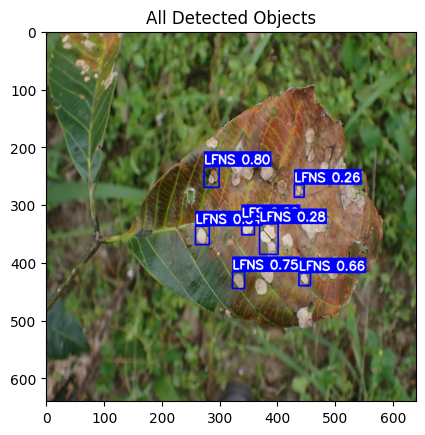

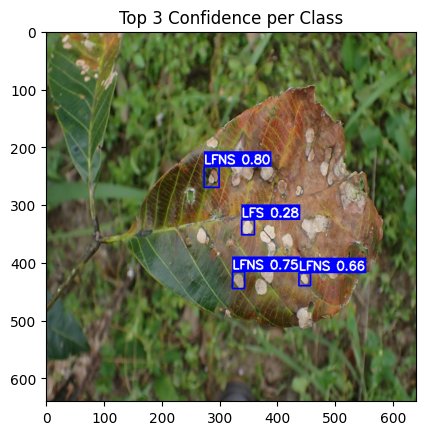


Class: LFS
จำนวน Object: 1
Top 3 confidence:
  Conf: 0.28, Position: (338, 326, 360, 352)

Class: LFNS
จำนวน Object: 6
Top 3 confidence:
  Conf: 0.80, Position: (273, 234, 299, 270)
  Conf: 0.75, Position: (322, 416, 343, 445)
  Conf: 0.66, Position: (437, 418, 457, 440)


In [ ]:
img = cv2.imread('/content/65SKA11_2mixLFNS_LFS_7.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_top3 = img.copy()

model = YOLO('best.pt')
names = model.names

w, h = img.shape[1], img.shape[0]
print(f"Image dimensions: {w}x{h}")

results = model.predict(source=img, conf=0.25)


class_data = [] # สร้าง list ของทุก Class
for box, cls, conf in zip(results[0].boxes.xyxy, results[0].boxes.cls, results[0].boxes.conf):
    x1, y1, x2, y2 = map(int, box.tolist())
    class_id = int(cls)
    class_name = names[class_id]
    confidence = float(conf)
    class_data.append({
        'class': class_name,
        'conf': confidence,
        'position': (x1, y1, x2, y2)
    })


class_data.sort(key=lambda x: x['conf'], reverse=True)

print(class_data)
# RGB
class_colors = {
    'Healthy': (0, 255, 0),
    'LFNS': (0, 0, 255),
    'LFS': (0, 0, 255),
    'PM': (255, 255, 0),
    'CoryL': (255, 255, 0),
    'BES': (255, 255, 0),
    'CLS': (255, 255, 0),
}


for data in class_data:
    class_name = data['class']
    confidence = data['conf']
    x1, y1, x2, y2 = data['position']

    color = class_colors.get(class_name, (128, 128, 128))

    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    label = f'{class_name} {confidence:.2f}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    font_thickness = 2

    (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

    cv2.rectangle(img, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)
    cv2.putText(img, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

# plt.figure(figsize=(20, 8))
# plt.imshow(img)
# plt.show()

print(f"มี Object ทั้งหมด {len(class_data)}")
unique_classes = set(data['class'] for data in class_data)
# print(f"มี Class ทั้งหมด {len(unique_classes)}")

# for class_name in unique_classes:
#     class_objects = [data for data in class_data if data['class'] == class_name]
#     print(f"\nClass: {class_name}")
#     print(f"จำนวน Object: {len(class_objects)}")
#     print("Top 3 confidence:")
#     for obj in class_objects[:3]:
#         print(f"  Conf: {obj['conf']:.2f}, Position: {obj['position']}")

########
# ตรวจสอบว่ามีเฉพาะ class Healthy หรือไม่
only_healthy = all(data['class'] == 'Healthy' for data in class_data)

# สร้าง dictionary เพื่อเก็บ Top 3 conf ของแต่ละ Class
top3_per_class = {}
for data in class_data:
    class_name = data['class']
    if class_name not in top3_per_class:
        top3_per_class[class_name] = []
    if len(top3_per_class[class_name]) < 3:
        top3_per_class[class_name].append(data)

# วาดกรอบและเขียนข้อความสำหรับ Top 3 conf ของแต่ละ Class
for class_name, top3_data in top3_per_class.items():
    if only_healthy or (class_name != 'Healthy' or only_healthy):
        for data in top3_data:
            confidence = data['conf']
            x1, y1, x2, y2 = data['position']

            color = class_colors.get(class_name, (128, 128, 128))

            cv2.rectangle(img_top3, (x1, y1), (x2, y2), color, 2)

            label = f'{class_name} {confidence:.2f}'
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.7
            font_thickness = 2

            (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

            cv2.rectangle(img_top3, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)
            cv2.putText(img_top3, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

# แสดงรูปภาพทั้งสองรูป
# plt.figure(figsize=(20, 16))

# plt.subplot(2, 1, 1)
plt.title("All Detected Objects")
plt.imshow(img)
# plt.axis('off')

plt.show()

# plt.subplot(2, 1, 2)
plt.title("Top 3 Confidence per Class")
plt.imshow(img_top3)
# plt.axis('off')

# plt.tight_layout()
plt.show()

# แสดงข้อมูลแต่ละ Class
for class_name in unique_classes:
    class_objects = [data for data in class_data if data['class'] == class_name]
    print(f"\nClass: {class_name}")
    print(f"จำนวน Object: {len(class_objects)}")
    print("Top 3 confidence:")
    for obj in class_objects[:3]:
        print(f"  Conf: {obj['conf']:.2f}, Position: {obj['position']}")

Image dimensions: 640x640

0: 640x640 1 Healthy, 2 PMs, 616.0ms
Speed: 4.0ms preprocess, 616.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
x: 3
remaining_objects: [{'class': 'PM', 'conf': 0.26604926586151123, 'position': (220, 7, 240, 20)}]


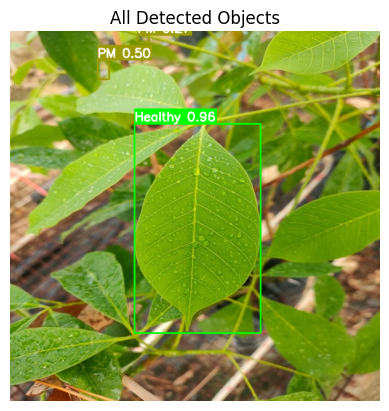

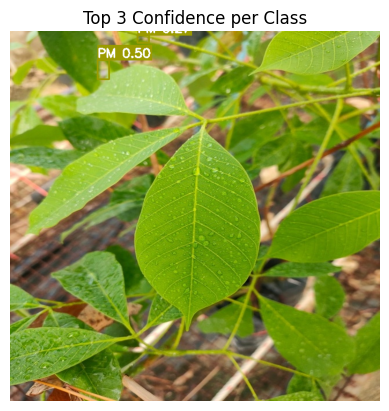

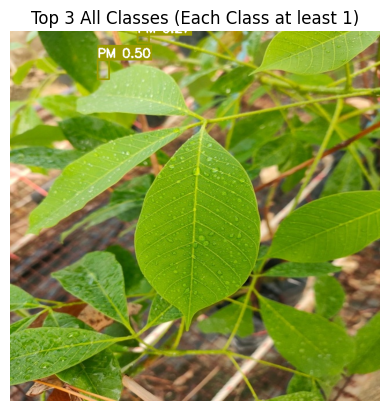

มี Object ทั้งหมด 3
มี Class ทั้งหมด 2

Class: PM
จำนวน Object: 2
จำนวน Object แสดงใน Top 3: 2
Objects:
  Conf: 0.50, Position: (151, 50, 171, 83)
  Conf: 0.27, Position: (220, 7, 240, 20)


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# อ่านและเตรียมรูปภาพ
img = cv2.imread('/content/66GH_healthy_323.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_top_x = img.copy()
img_top3 = img.copy()

# โหลด YOLO model
model = YOLO('best.pt')
names = model.names

# ขนาดรูปภาพ
w, h = img.shape[1], img.shape[0]
print(f"Image dimensions: {w}x{h}")

# ทำนายวัตถุในรูปภาพ
results = model.predict(source=img, conf=0.25)

# สร้าง list ที่เก็บข้อมูลของแต่ละ Class
class_data = []
for box, cls, conf in zip(results[0].boxes.xyxy, results[0].boxes.cls, results[0].boxes.conf):
    x1, y1, x2, y2 = map(int, box.tolist())
    class_id = int(cls)
    class_name = names[class_id]
    confidence = float(conf)
    class_data.append({
        'class': class_name,
        'conf': confidence,
        'position': (x1, y1, x2, y2)
    })

# เรียงลำดับตาม conf จากมากไปน้อย
class_data.sort(key=lambda x: x['conf'], reverse=True)

# RGB
class_colors = {
    'Healthy': (0, 255, 0),
    'LFNS': (255, 128, 0),
    'LFS': (204, 0, 0),
    'PM': (155, 155, 0),
    'CoryL': (255, 255, 0),
    'BES': (255, 255, 0),
    'CLS': (255, 255, 0),
}

# วาดกรอบและเขียนข้อความสำหรับทุก object
for data in class_data:
    class_name = data['class']
    confidence = data['conf']
    x1, y1, x2, y2 = data['position']

    color = class_colors.get(class_name, (128, 128, 128))

    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    label = f'{class_name} {confidence:.2f}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    font_thickness = 2

    (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

    cv2.rectangle(img, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)
    cv2.putText(img, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

# สร้างรูปใหม่สำหรับแสดง Top 3 conf ของแต่ละ Class


# ตรวจสอบว่ามีเฉพาะ class Healthy หรือไม่
only_healthy = all(data['class'] == 'Healthy' for data in class_data)

# สร้าง dictionary เพื่อเก็บ Top 3 conf ของแต่ละ Class
top3_per_class = {}
for data in class_data:
    class_name = data['class']
    if class_name not in top3_per_class:
        top3_per_class[class_name] = []
    if len(top3_per_class[class_name]) < 3:
        top3_per_class[class_name].append(data)

# วาดกรอบและเขียนข้อความสำหรับ Top 3 conf ของแต่ละ Class
for class_name, top3_data in top3_per_class.items():
    if only_healthy or (class_name != 'Healthy' or only_healthy):
        for data in top3_data:
            confidence = data['conf']
            x1, y1, x2, y2 = data['position']

            color = class_colors.get(class_name, (128, 128, 128))

            cv2.rectangle(img_top3, (x1, y1), (x2, y2), color, 2)

            label = f'{class_name} {confidence:.2f}'
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.7
            font_thickness = 2

            (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

            cv2.rectangle(img_top3, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)
            cv2.putText(img_top3, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

# สร้างรูปใหม่สำหรับแสดง Top x all class


# นับจำนวน Class ที่แตกต่างกัน
unique_classes = set(data['class'] for data in class_data)
num_classes = len(unique_classes)

# กำหนดค่า x


# only_healthy = all(data['class'] == 'Healthy' for data in class_data)
remove_healthy = num_classes > 1 and 'Healthy' in unique_classes
# สร้าง dictionary เพื่อเก็บ Top x objects ของแต่ละ Class
# top_x_per_class = {class_name: [] for class_name in unique_classes}
top_x_per_class = {class_name: [] for class_name in unique_classes if not (remove_healthy and class_name == 'Healthy')}
x = len(top_x_per_class) if len(top_x_per_class) > 3 else 3
print("x:",x)
# x = max(len(top_x_per_class), 3)
# เลือก object ที่มี confidence สูงสุดของแต่ละ Class ก่อน
# for class_name in unique_classes:
#     class_objects = [data for data in class_data if data['class'] == class_name]
#     if class_objects:
#         top_object = sorted(class_objects, key=lambda d: d['conf'], reverse=True)[0]
#         top_x_per_class[class_name].append(top_object)
for class_name in unique_classes:
    if not (remove_healthy and class_name == 'Healthy'):
        class_objects = [data for data in class_data if data['class'] == class_name]
        if class_objects:
            top_object = sorted(class_objects, key=lambda d: d['conf'], reverse=True)[0]
            top_x_per_class[class_name].append(top_object)

# เพิ่ม objects ที่เหลือจนครบ x objects
# remaining_objects = [data for data in class_data if data not in [obj for objs in top_x_per_class.values() for obj in objs]]
# remaining_objects.sort(key=lambda d: d['conf'], reverse=True)
remaining_objects = [data for data in class_data if data not in [obj for objs in top_x_per_class.values() for obj in objs]]
remaining_objects = [obj for obj in remaining_objects if not (remove_healthy and obj['class'] == 'Healthy')]
remaining_objects.sort(key=lambda d: d['conf'], reverse=True)
print("remaining_objects:",remaining_objects)
while len([obj for objs in top_x_per_class.values() for obj in objs]) < x and remaining_objects:
    top_object = remaining_objects.pop(0)
    top_x_per_class[top_object['class']].append(top_object)

# วาดกรอบและเขียนข้อความสำหรับ Top x objects
for class_name, objects in top_x_per_class.items():
  # if only_healthy or (class_name != 'Healthy' or only_healthy):
    for data in objects:
        confidence = data['conf']
        x1, y1, x2, y2 = data['position']

        color = class_colors.get(class_name, (128, 128, 128))

        cv2.rectangle(img_top_x, (x1, y1), (x2, y2), color, 2)

        label = f'{class_name} {confidence:.2f}'
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2

        (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

        cv2.rectangle(img_top_x, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)
        cv2.putText(img_top_x, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

# แสดงรูปภาพทั้งสามรูป
# plt.figure(figsize=(20, 24))


plt.title("All Detected Objects")
plt.imshow(img)
plt.axis('off')
plt.show()

plt.title("Top 3 Confidence per Class")
plt.imshow(img_top3)
plt.axis('off')
plt.show()

plt.title(f"Top {x} All Classes (Each Class at least 1)")
plt.imshow(img_top_x)
plt.axis('off')
plt.show()

print(f"มี Object ทั้งหมด {len(class_data)}")
print(f"มี Class ทั้งหมด {len(unique_classes)}")

# แสดงข้อมูลแต่ละ Class
for class_name, objects in top_x_per_class.items():
    print(f"\nClass: {class_name}")
    print(f"จำนวน Object: {len(class_objects)}")
    print(f"จำนวน Object แสดงใน Top {x}: {len(objects)}")
    print("Objects:")
    for obj in objects:
        print(f"  Conf: {obj['conf']:.2f}, Position: {obj['position']}")

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# อ่านและเตรียมรูปภาพ
img = cv2.imread('/content/65SKA11_1mixLFNS_LFS_4.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_top_x = img.copy()
img_top3 = img.copy()

# โหลด YOLO model
model = YOLO('best.pt')
names = model.names

# ขนาดรูปภาพ
w, h = img.shape[1], img.shape[0]
print(f"Image dimensions: {w}x{h}")

# ทำนายวัตถุในรูปภาพ
results = model.predict(source=img, conf=0.25)

# สร้าง list ที่เก็บข้อมูลของแต่ละ Class
class_data = []
for box, cls, conf in zip(results[0].boxes.xyxy, results[0].boxes.cls, results[0].boxes.conf):
    x1, y1, x2, y2 = map(int, box.tolist())
    class_id = int(cls)
    class_name = names[class_id]
    confidence = float(conf)
    class_data.append({
        'class': class_name,
        'conf': confidence,
        'position': (x1, y1, x2, y2)
    })

# เรียงลำดับตาม conf จากมากไปน้อย
class_data.sort(key=lambda x: x['conf'], reverse=True)

# RGB
class_colors = {
    'Healthy': (0, 255, 0),
    'LFNS': (0, 0, 255),
    'LFS': (0, 0, 255),
    'PM': (155, 155, 0),
    'CoryL': (255, 255, 0),
    'BES': (255, 255, 0),
    'CLS': (255, 255, 0),
}

# วาดกรอบและเขียนข้อความสำหรับทุก object
for data in class_data:
    class_name = data['class']
    confidence = data['conf']
    x1, y1, x2, y2 = data['position']

    color = class_colors.get(class_name, (128, 128, 128))

    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    label = f'{class_name} {confidence:.2f}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    font_thickness = 2

    (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

    cv2.rectangle(img, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)
    cv2.putText(img, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

# สร้างรูปใหม่สำหรับแสดง Top 3 conf ของแต่ละ Class


# ตรวจสอบว่ามีเฉพาะ class Healthy หรือไม่
only_healthy = all(data['class'] == 'Healthy' for data in class_data)

# สร้าง dictionary เพื่อเก็บ Top 3 conf ของแต่ละ Class
top3_per_class = {}
for data in class_data:
    class_name = data['class']
    if class_name not in top3_per_class:
        top3_per_class[class_name] = []
    if len(top3_per_class[class_name]) < 3:
        top3_per_class[class_name].append(data)

# วาดกรอบและเขียนข้อความสำหรับ Top 3 conf ของแต่ละ Class
for class_name, top3_data in top3_per_class.items():
    if only_healthy or (class_name != 'Healthy' or only_healthy):
        for data in top3_data:
            confidence = data['conf']
            x1, y1, x2, y2 = data['position']

            color = class_colors.get(class_name, (128, 128, 128))

            cv2.rectangle(img_top3, (x1, y1), (x2, y2), color, 2)

            label = f'{class_name} {confidence:.2f}'
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.7
            font_thickness = 2

            (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

            cv2.rectangle(img_top3, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)
            cv2.putText(img_top3, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

# สร้างรูปใหม่สำหรับแสดง Top x all class


# นับจำนวน Class ที่แตกต่างกัน
unique_classes = set(data['class'] for data in class_data)
num_classes = len(unique_classes)

# กำหนดค่า x
x = num_classes if num_classes > 3 else 3

only_healthy = all(data['class'] == 'Healthy' for data in class_data)
# สร้าง dictionary เพื่อเก็บ Top x objects ของแต่ละ Class
top_x_per_class = {class_name: [] for class_name in unique_classes}

# เลือก object ที่มี confidence สูงสุดของแต่ละ Class ก่อน
# เลือก object ที่มี confidence สูงสุดของแต่ละ Class ก่อน
for class_name in unique_classes:
    class_objects = [data for data in class_data if data['class'] == class_name]
    if class_objects:
        top_object = sorted(class_objects, key=lambda d: d['conf'], reverse=True)[0]
        top_x_per_class[class_name].append(top_object)

# เพิ่ม objects ที่เหลือจนครบ x objects
remaining_objects = [data for data in class_data if data not in [obj for objs in top_x_per_class.values() for obj in objs]]
remaining_objects.sort(key=lambda d: d['conf'], reverse=True)
print("remaining_objects:",remaining_objects)
while len([obj for objs in top_x_per_class.values() for obj in objs]) <= x and remaining_objects:
    top_object = remaining_objects.pop(0)
    top_x_per_class[top_object['class']].append(top_object)

# วาดกรอบและเขียนข้อความสำหรับ Top x objects
for class_name, objects in top_x_per_class.items():
  if only_healthy or (class_name != 'Healthy' or only_healthy):
    for data in objects:
        confidence = data['conf']
        x1, y1, x2, y2 = data['position']

        color = class_colors.get(class_name, (128, 128, 128))

        cv2.rectangle(img_top_x, (x1, y1), (x2, y2), color, 2)

        label = f'{class_name} {confidence:.2f}'
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2

        (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

        cv2.rectangle(img_top_x, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)
        cv2.putText(img_top_x, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

# แสดงรูปภาพทั้งสามรูป
# plt.figure(figsize=(20, 24))


plt.title("All Detected Objects")
plt.imshow(img)
plt.axis('off')
plt.show()

plt.title("Top 3 Confidence per Class")
plt.imshow(img_top3)
plt.axis('off')
plt.show()

plt.title(f"Top {x} All Classes (Each Class at least 1)")
plt.imshow(img_top_x)
plt.axis('off')
plt.show()

print(f"มี Object ทั้งหมด {len(class_data)}")
print(f"มี Class ทั้งหมด {len(unique_classes)}")

# แสดงข้อมูลแต่ละ Class
for class_name, objects in top_x_per_class.items():
    print(f"\nClass: {class_name}")
    print(f"จำนวน Object: {len(class_objects)}")
    print(f"จำนวน Object แสดงใน Top {x}: {len(objects)}")
    print("Objects:")
    for obj in objects:
        print(f"  Conf: {obj['conf']:.2f}, Position: {obj['position']}")

(1108, 1477)

0: 640x480 5 LFSs, 476.4ms
Speed: 6.9ms preprocess, 476.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


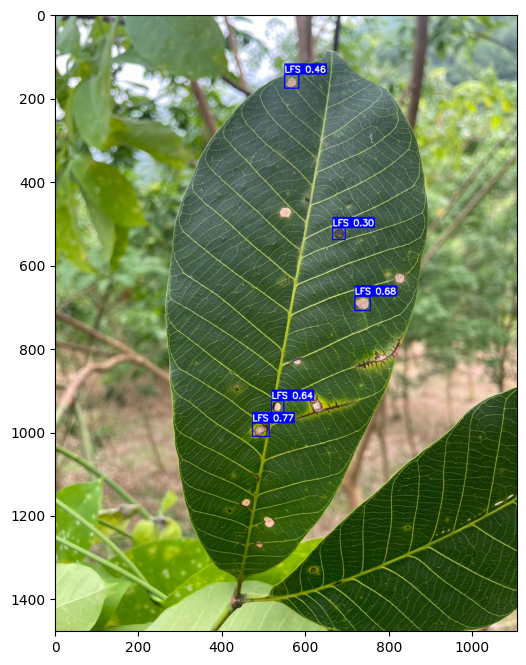

มี Object ทั้งหมด 5 
มี Class ทั้งหมด 1


In [ ]:
img = cv2.imread('/content/67NAN06_1CoryL_9.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = cv2.resize(img, (640, 640))
model = YOLO('best.pt')
names = model.names

w = img.shape[1]
h = img.shape[0]
max = (w,h)
print(max)

results = model.predict(source=img,conf = 0.25)

bb_ALL = results[0].boxes.xyxy
BB = bb_ALL.tolist()
cc_ALL = results[0].boxes.cls
CC = cc_ALL.tolist()



# RGB
class_colors = {
    'Healthy': (0, 255, 0),     # สีเขียว
    'LFNS': (0, 0, 255),        # สีน้ำเงิน
    'LFS': (0, 0, 255),         # สีน้ำเงิน
    'PM': (255, 255, 0),        #
    'CoryL': (255, 255, 0),     #
    'BES': (255, 255, 0),
    'CLS': (255, 255, 0),
}


for box, cls, conf in zip(results[0].boxes.xyxy, results[0].boxes.cls, results[0].boxes.conf):
    x1, y1, x2, y2 = map(int, box.tolist())
    class_id = int(cls)
    class_name = names[class_id]
    confidence = float(conf)


    color = class_colors.get(class_name, (128, 128, 128))


    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)


    label = f'{class_name} {confidence:.2f}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    font_thickness = 2

    (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

    cv2.rectangle(img, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)


    cv2.putText(img, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

plt.figure(figsize=(20, 8))
plt.imshow(img)
plt.show()

print(f"มี Object ทั้งหมด {len(CC)} ")
unique_classes = set(CC)
print(f"มี Class ทั้งหมด {len(unique_classes)}")




(640, 640)

0: 640x640 3 LFSs, 1 PM, 619.4ms
Speed: 5.3ms preprocess, 619.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


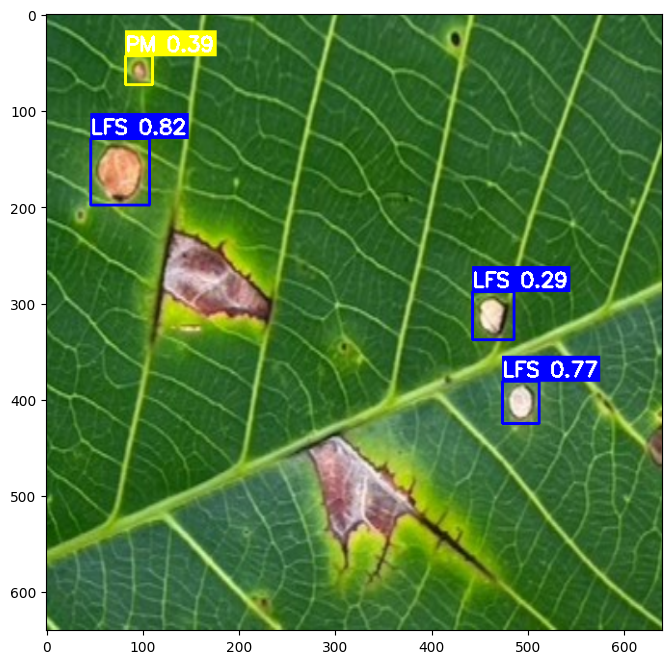

มี Object ทั้งหมด 4 
มี Class ทั้งหมด 2


In [ ]:
img = cv2.imread('/content/67NAN06_1CoryL_8.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.resize(img, (640, 640))
model = YOLO('best.pt')
names = model.names

w = img.shape[1]
h = img.shape[0]
max = (w,h)
maxsize = max[0] if max[0] > max[1] else max[1]
print(max)

results = model.predict(source=img,conf = 0.2, imgsz=640)

bb_ALL = results[0].boxes.xyxy
BB = bb_ALL.tolist()
cc_ALL = results[0].boxes.cls
CC = cc_ALL.tolist()



# RGB
class_colors = {
    'Healthy': (0, 255, 0),     # สีเขียว
    'LFNS': (0, 0, 255),        # สีน้ำเงิน
    'LFS': (0, 0, 255),         # สีน้ำเงิน
    'PM': (255, 255, 0),        #
    'CoryL': (255, 255, 0),     #
    'BES': (255, 255, 0),
    'CLS': (255, 255, 0),
}


for box, cls, conf in zip(results[0].boxes.xyxy, results[0].boxes.cls, results[0].boxes.conf):
    x1, y1, x2, y2 = map(int, box.tolist())
    class_id = int(cls)
    class_name = names[class_id]
    confidence = float(conf)


    color = class_colors.get(class_name, (128, 128, 128))


    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)


    label = f'{class_name} {confidence:.2f}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    font_thickness = 2

    (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

    cv2.rectangle(img, (x1, y1 - label_height - 10), (x1 + label_width, y1), color, -1)


    cv2.putText(img, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)

plt.figure(figsize=(20, 8))
plt.imshow(img)
plt.show()

print(f"มี Object ทั้งหมด {len(CC)} ")
unique_classes = set(CC)
print(f"มี Class ทั้งหมด {len(unique_classes)}")




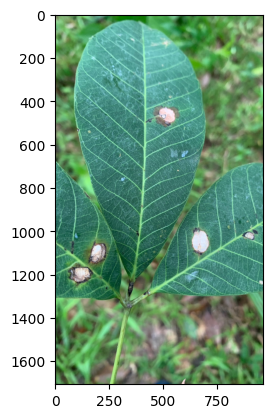

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
model = YOLO('best.pt')
names = model.names
results = model.predict(source=img,conf = 0.5)


0: 640x384 2 LFNSs, 1 LFS, 1384.2ms
Speed: 4.0ms preprocess, 1384.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
bb_ALL = results[0].boxes.xyxy
BB = bb_ALL.tolist()
cc_ALL = results[0].boxes.cls
CC = cc_ALL.tolist()

In [ ]:
CC

[1.0, 2.0, 1.0]